## MNIST Dataset Analysis

This notebook presents an analysis of the MNIST dataset, exploring its characteristics and distributions. The MNIST dataset is a collection of handwritten digits widely used in machine learning.

In [ ]:
# If the script is executed for the first time, please run 'pip install --no-cache-dir -r requirements.txt' first.
# This will ensure all packages are installed.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Data Loading 

The MNIST dataset was loaded using TensorFlow's keras API and preprocessed to include a channel dimension:

-   Training data shape: (60000, 28, 28, 1)
-   Each image is 28x28 pixels
-   Single channel (grayscale)
-   60,000 training images

In [21]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
# Reshape to include channel dimension (width, height, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [56]:
# Print the shape of training data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)


### Sample Image Display

-   Displayed a single sample digit from the training set
-   Used a grayscale colormap to show pixel intensities
-   Added a colorbar to indicate the intensity scale (0-255)
-   Demonstrates the typical appearance of MNIST digits

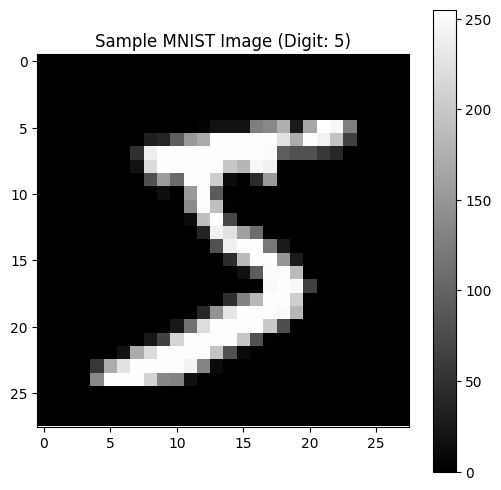

In [57]:
# Display a sample image (need to squeeze to remove channel dim for display)
plt.figure(figsize=(6, 6))
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title('Sample MNIST Image (Digit: {})'.format(y_train[0]))
plt.colorbar()
plt.show()


### Average Pixel Intensity Heatmap

-   Calculated the mean pixel value across all training images
-   Visualized using a 'hot' colormap
-   Revealed that digits are typically centered in the image
-   Brighter colors (yellow/white) indicate higher average pixel values
-   Darker colors (red/black) show areas where digits rarely appear
-   Provides insight into the spatial distribution of digit writing patterns

In [58]:
# Calculate average pixel intensity across all training images
avg_intensity = np.mean(X_train, axis=0).squeeze()



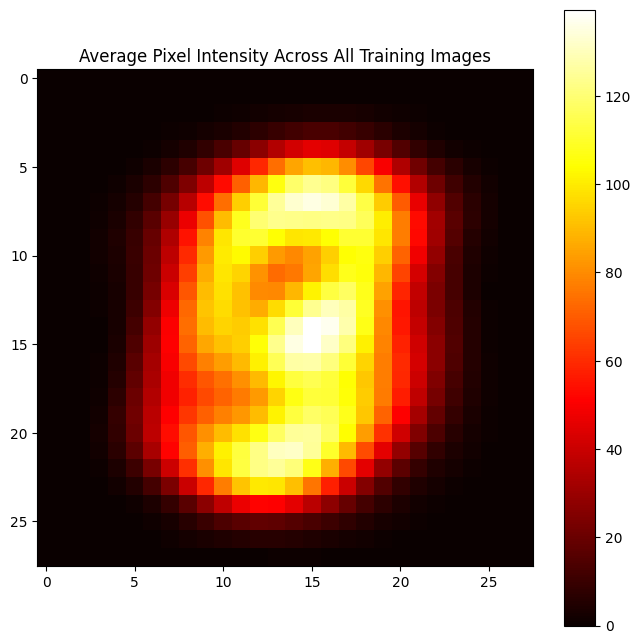

In [59]:
# Plot average intensity heatmap
plt.figure(figsize=(8, 8))
plt.imshow(avg_intensity, cmap='hot')
plt.title('Average Pixel Intensity Across All Training Images')
plt.colorbar()
plt.show()


### Overall Pixel Intensity Distribution

-   Created a histogram of all pixel values in the training set
-   Shows the binary nature of MNIST images
-   Major peaks at:

    -   0 (black, background pixels)
    -   255 (white, digit strokes)
-   Few gray values in between, mainly at digit edges

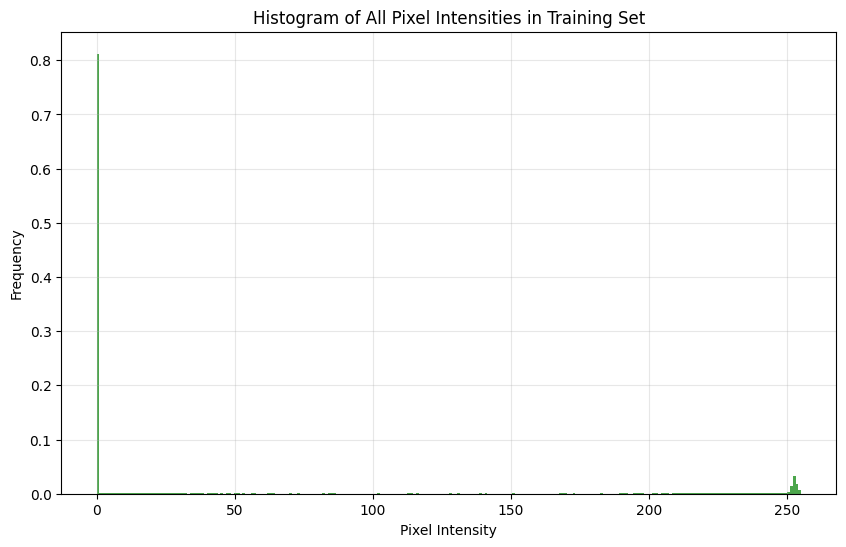

In [50]:
# Create histogram of all pixel values in the training set
plt.figure(figsize=(10, 6))
plt.hist(X_train.ravel(), bins=256, range=(0, 255), density=True, color='green', alpha=0.7)
plt.title('Histogram of All Pixel Intensities in Training Set')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


### Digit Distribution

-   Analyzed the frequency of each digit (0-9) in the training set
-   Created a bar chart showing the distribution
-   Helps identify any class imbalance in the dataset

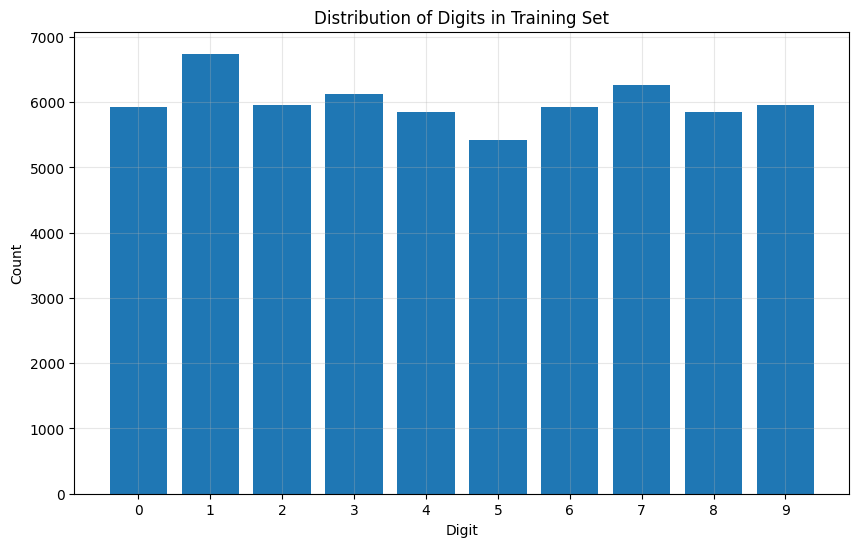

In [51]:
# Distribution of digits in training set
plt.figure(figsize=(10, 6))
digit_counts = np.bincount(y_train)
plt.bar(range(10), digit_counts)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)
plt.show()

### Statistical Analysis

Basic statistics of the dataset:

-   Minimum pixel value: 0 (black)
-   Maximum pixel value: 255 (white)
-   Mean pixel value: 33.318421449829934
-   Standard deviation: 78.56748998339798

In [52]:
# Calculate some basic statistics
print("\nDataset Statistics:")
print("Min pixel value:", np.min(X_train))
print("Max pixel value:", np.max(X_train))
print("Mean pixel value:", np.mean(X_train))
print("Standard deviation:", np.std(X_train))


Dataset Statistics:
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 33.318421449829934
Standard deviation: 78.56748998339798
